# **Cyber-Attack Detection System for IoHT Devices Using Federated Learning**
---
### **Project Team:**
- **Jenin Mansour**
- **Sondos Farrah**
- **Alaa Saleem**

### **Supervised by:**
- **Dr. Ahmed Shawahna**

### **Birzeit University**  


---



 ## **1. Data Preprocessing**


---
### **1.1. Data Exploration**
In this section, we will analyze and explore the [ECU-IOHT dataset](https://ro.ecu.edu.au/datasets/48/). The goal of this phase is to understand the nature of the data we are working with and uncover key patterns and general distributions of the variables.


---



Import libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler



Read the Dataset from Google Drive



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/dataset/ECU_IoHT.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


First 5 rows from the dataset

In [ ]:
df.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Type,Type of attack
0,1,0.000000,Alfa_97:cf:63,Broadcast,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing
1,2,0.002956,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing
2,3,0.200725,Alfa_97:cf:63,Broadcast,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing
3,4,0.202713,192.168.43.186,192.168.43.1,DNS,85,Standard query 0x0c44 PTR 1.43.168.192.in-addr...,Normal,No Attack
4,5,0.411565,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing


The shape of the DataFrame (#rows and #columns)



In [ ]:
print(df.shape)

(111207, 9)


Data Summary

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111207 entries, 0 to 111206
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   No.             111207 non-null  int64  
 1   Time            111207 non-null  float64
 2   Source          111207 non-null  object 
 3   Destination     111207 non-null  object 
 4   Protocol        111207 non-null  object 
 5   Length          111207 non-null  int64  
 6   Info            111207 non-null  object 
 7   Type            111207 non-null  object 
 8   Type of attack  111207 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 7.6+ MB
None


Structure and distribution of the data

In [ ]:
for col in ['Time', 'Source','Destination','Protocol','Length','Info','Type','Type of attack']:
    print(f'Name: {col} dtype: {df[col].dtype}\n')
    print(f'{df[col].value_counts()}\n')
    print('---------------------------------------------------------' + '\n\n')

Name: Time dtype: float64

Time
252.707523      2
10039.100050    2
0.000000        1
7122.936963     1
7123.120067     1
               ..
6367.191785     1
6367.171588     1
6367.151127     1
6367.130917     1
10109.390320    1
Name: count, Length: 111205, dtype: int64

---------------------------------------------------------


Name: Source dtype: object

Source
192.168.43.200    82889
192.168.43.186    14661
192.168.43.1       3338
Alfa_97:cf:63      2100
172.217.25.141     1276
                  ...  
13.32.73.119         14
96.7.134.29          14
52.9.210.145          9
35.244.159.8          8
151.139.128.14        6
Name: count, Length: 69, dtype: int64

---------------------------------------------------------


Name: Destination dtype: object

Destination
192.168.43.1      82697
192.168.43.186    14568
192.168.43.200     4501
Broadcast          1513
52.208.217.22      1353
                  ...  
96.7.134.29          15
13.32.73.119         14
52.9.210.145         11
35.244.1

Total Null values

In [ ]:
df.isnull().sum()

,0
No.,0
Time,0
Source,0
Destination,0
Protocol,0
Length,0
Info,0
Type,0
Type of attack,0


Protocol Distribution plot

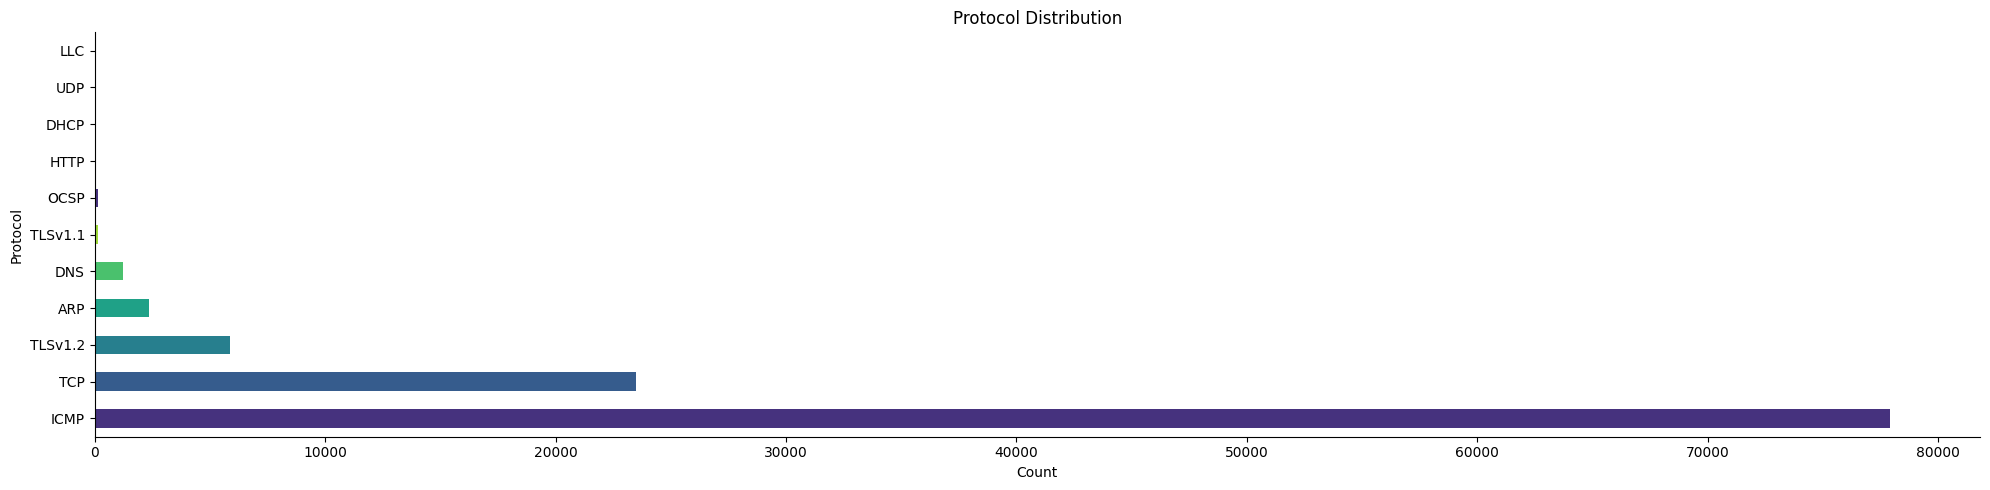

In [ ]:
plt.figure(figsize=(20, 5))
df['Protocol'].value_counts().plot(kind='barh', color=sns.color_palette('viridis'))
plt.title('Protocol Distribution')
plt.xlabel('Count')
plt.ylabel('Protocol')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

Type of attack Distribution plot

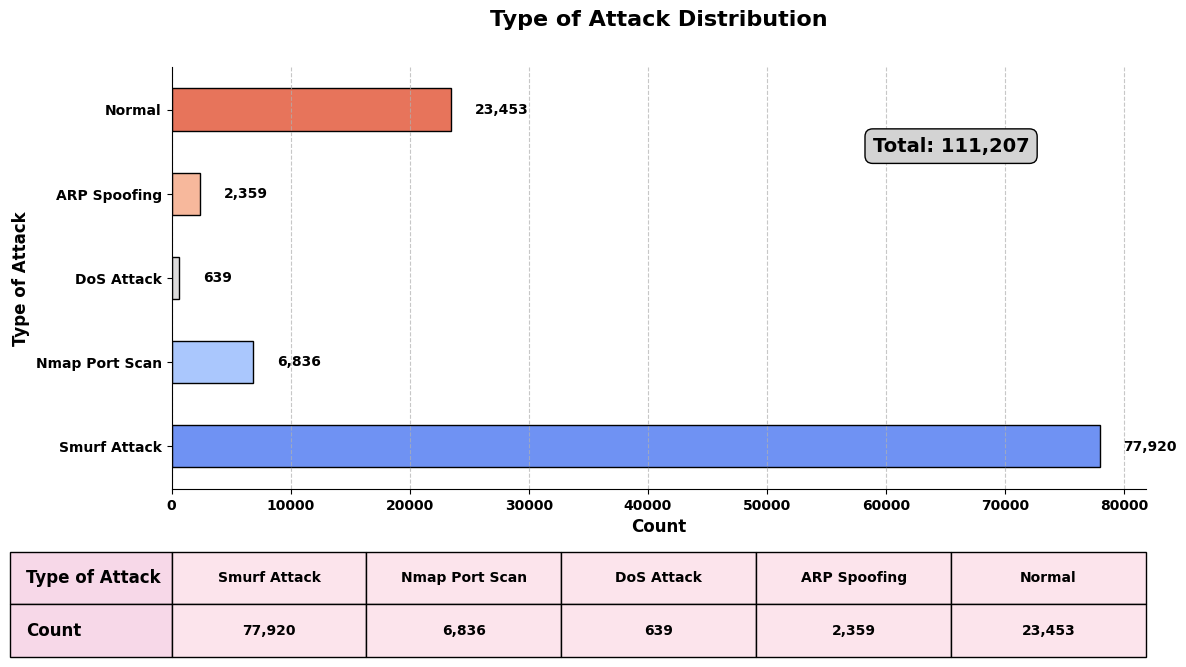

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample dataframe
df_plot = pd.DataFrame({
    "Type of attack": ["Smurf Attack", "Nmap Port Scan", "DoS Attack", "ARP Spoofing", "Normal"],
    "Count": [77920, 6836, 639, 2359, 23453],
})

# Calculate total count
total_count = df_plot['Count'].sum()

# Plot setup
fig, ax = plt.subplots(figsize=(12, 6))

# Use a color palette for the bars
colors = sns.color_palette("coolwarm", len(df_plot))

# Create horizontal bar plot
df_plot.set_index("Type of attack")['Count'].plot(
    kind='barh',
    color=colors,
    edgecolor="black",
    ax=ax
)

# Add value labels to the bars
for index, value in enumerate(df_plot['Count']):
    ax.text(
        value + 2000,  # offset to place text
        index,
        f"{value:,}",
        va='center',
        fontsize=10,
        fontweight='bold',
        color='black'
    )

# Make all axis labels and title bold
ax.set_title('Type of Attack Distribution', fontsize=16, fontweight='bold', pad=30)
ax.set_xlabel('Count', fontsize=12, fontweight='bold')
ax.set_ylabel('Type of Attack', fontsize=12, fontweight='bold')

# Make x and y tick labels bold
plt.setp(ax.get_xticklabels(), fontweight='bold')
plt.setp(ax.get_yticklabels(), fontweight='bold')

# Add grid lines
ax.xaxis.grid(True, linestyle="--", alpha=0.7)

# Remove unnecessary spines
ax.spines[['top', 'right']].set_visible(False)

# Prepare table data
table_data = [
    df_plot["Type of attack"].tolist(),
    [f"{count:,}" for count in df_plot["Count"]],
]
columns = ['Type of Attack', 'Count']

# Create a horizontal table
table = plt.table(
    cellText=table_data,
    rowLabels=columns,
    cellLoc='center',
    loc='bottom',
    bbox=[0.0, -0.4, 1.0, 0.25],  # Adjust position and size
)

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)

# Make all table cell text bold and set background color
for (row, col), cell in table.get_celld().items():
    cell.set_text_props(weight="bold")  # Make text bold
    if col == -1:  # Row labels
        cell.set_fontsize(12)
        cell.set_facecolor('#f7d8e8')  # Light pink background for row labels
    else:  # Data cells
        cell.set_facecolor('#fce4ec')  # Light pink background for data cells

# Add total count at the top of the figure (bold text, box style)
plt.text(
    0.8, 0.8, f"Total: {total_count:,}",
    fontsize=14, fontweight='bold', color='black',
    horizontalalignment='center',
    transform=ax.transAxes,
    bbox=dict(facecolor='#d3d3d3', edgecolor='black', boxstyle='round,pad=0.4')
)

# Adjust layout for better visualization
plt.subplots_adjust(left=0.2, bottom=0.5)
plt.tight_layout()
plt.show()


Attack / Not Attack Distrbution

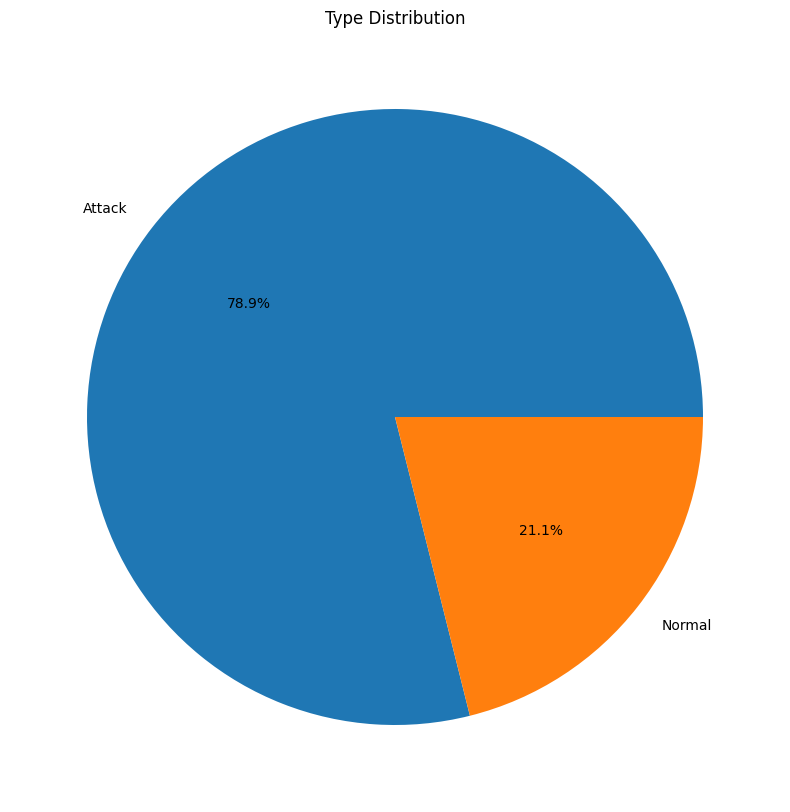

In [ ]:
plt.figure(figsize=(10, 10))
plt.pie(df['Type'].value_counts(), labels=df['Type'].value_counts().index, autopct='%1.1f%%')
plt.title('Type Distribution')
plt.show()


Scatter plot: Visualize the distribution of Protocol across Type of attack

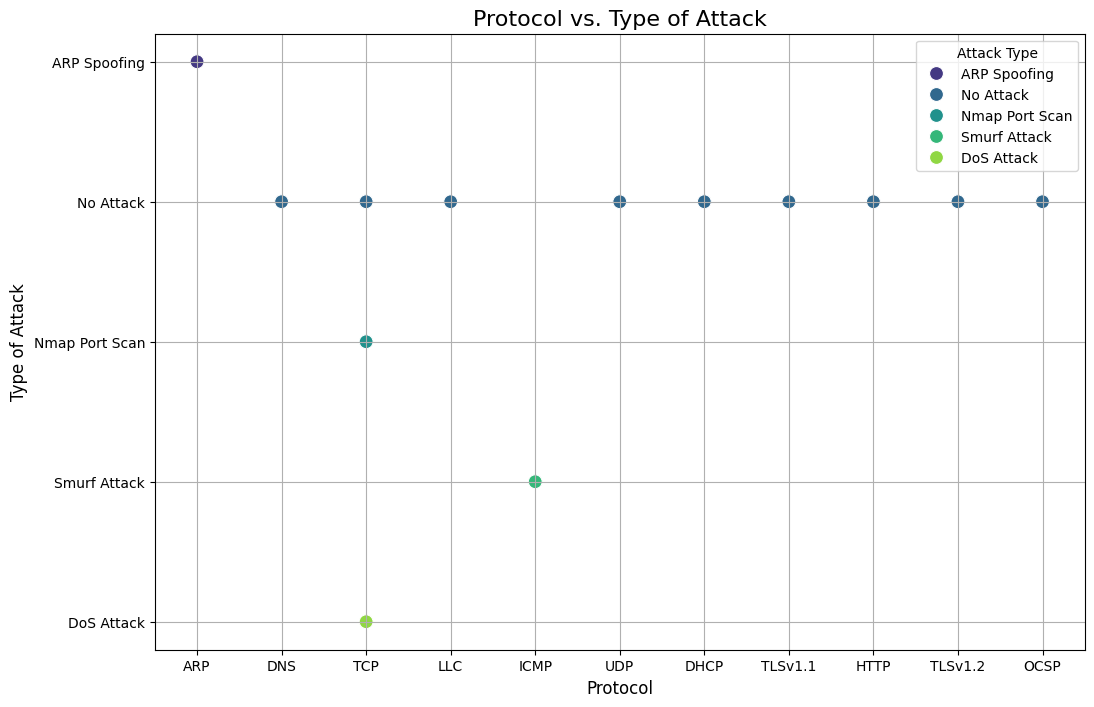

In [ ]:
protocol_column = 'Protocol'
attack_column = 'Type of attack'

# Scatter plot using seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=protocol_column, y=attack_column, hue=attack_column, palette='viridis', s=100)
plt.title('Protocol vs. Type of Attack', fontsize=16)
plt.xlabel('Protocol', fontsize=12)
plt.ylabel('Type of Attack', fontsize=12)
plt.legend(title='Attack Type', fontsize=10)
plt.grid(True)
plt.show()

Scatter plot: Visualize the distribution of  type of attack across length

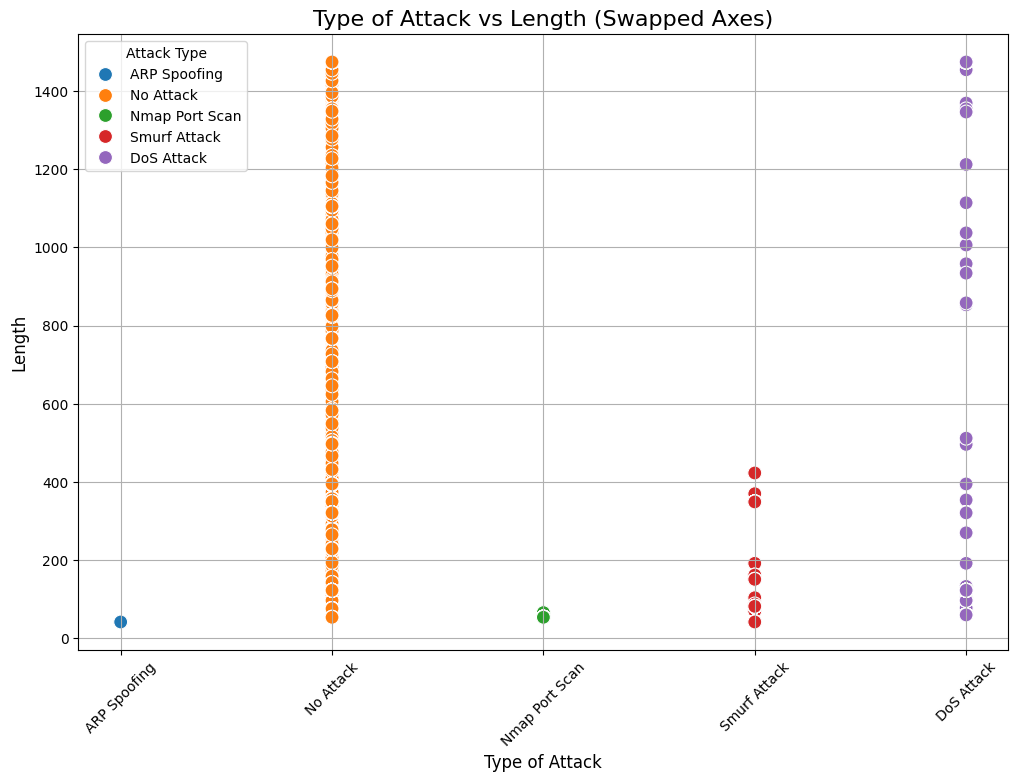

In [ ]:
attack_column = 'Type of attack'
length_column = 'Length'

# Scatter plot for type of attack vs length
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=attack_column, y=length_column, hue=attack_column, palette='tab10', s=100)
plt.title('Type of Attack vs Length (Swapped Axes)', fontsize=16)
plt.xlabel('Type of Attack', fontsize=12)
plt.ylabel('Length', fontsize=12)
plt.legend(title='Attack Type', fontsize=10)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### **1.2. Data Cleaning**

Encode categorical features using Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns.remove('Type of attack')

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = one_hot_encoder.fit_transform(df[['Type of attack']])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(['Type of attack']))

df = df.drop(columns=['Type of attack']).reset_index(drop=True)
df = pd.concat([df, one_hot_df], axis=1)


In [ ]:
df.head()
# Attack 0
# Normal 1

,No.,Time,Source,Destination,Protocol,Length,Info,Type,Type of attack_ARP Spoofing,Type of attack_DoS Attack,Type of attack_Nmap Port Scan,Type of attack_No Attack,Type of attack_Smurf Attack
0,1,0.000000,67,69,0,42,23250,0,1.0,0.0,0.0,0.0,0.0
1,2,0.002956,64,68,0,42,1872,0,1.0,0.0,0.0,0.0,0.0
2,3,0.200725,67,69,0,42,23250,0,1.0,0.0,0.0,0.0,0.0
3,4,0.202713,45,44,2,85,22388,1,0.0,0.0,0.0,1.0,0.0
4,5,0.411565,64,68,0,42,1872,0,1.0,0.0,0.0,0.0,0.0


correlation matrix

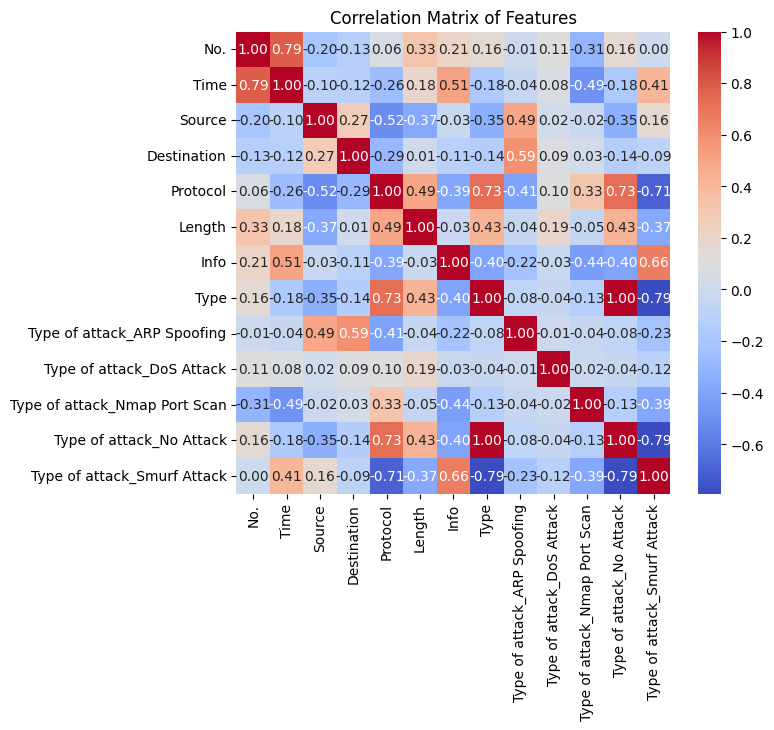

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(7, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# Because the values are discrete >>>>>> i think the correlation matrix  might not provide meaningful insight into relationships.

Normalize Numerical Features

Drop No. column

In [ ]:
df.drop('No.', axis=1, inplace=True)
df.drop('Time', axis=1, inplace=True)


In [ ]:
df.head()

,Source,Destination,Protocol,Length,Info,Type,Type of attack_ARP Spoofing,Type of attack_DoS Attack,Type of attack_Nmap Port Scan,Type of attack_No Attack,Type of attack_Smurf Attack
0,67,69,0,42,23250,0,1.0,0.0,0.0,0.0,0.0
1,64,68,0,42,1872,0,1.0,0.0,0.0,0.0,0.0
2,67,69,0,42,23250,0,1.0,0.0,0.0,0.0,0.0
3,45,44,2,85,22388,1,0.0,0.0,0.0,1.0,0.0
4,64,68,0,42,1872,0,1.0,0.0,0.0,0.0,0.0


In [ ]:
save_path = '/content/drive/MyDrive/dataset/ECU_Cleaned.csv'
df.to_csv(save_path, index=False)

## **2. Federated Learning**

---
**Setup TensorFlow Federated**

**TensorFlow Federated** allows us to easily implement decentralized training, which is crucial for our project. By using **TensorFlow**, we ensure that the framework is efficient, widely supported, and well-suited for handling the complexity of federated learning in distributed environments.



In [ ]:

!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-federated


  Using cached tensorflow_federated-0.87.0-py3-none-manylinux_2_31_x86_64.whl.metadata (19 kB)
  Using cached attrs-23.2.0-py3-none-any.whl.metadata (9.5 kB)
  Using cached dm_tree-0.1.8-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.9 kB)
  Using cached dp_accounting-0.4.3-py3-none-any.whl.metadata (1.8 kB)
  Using cached google_vizier-0.1.11-py3-none-any.whl.metadata (10 kB)
  Using cached jaxlib-0.4.14-cp311-cp311-manylinux2014_x86_64.whl.metadata (2.0 kB)
  Using cached jax-0.4.14.tar.gz (1.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached ml_dtypes-0.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 55.1 MB/s e

In [ ]:
%load_ext tensorboard

Test the Installation

In [ ]:
# @title Default title text
import collections

import numpy as np
import tensorflow as tf
import tensorflow_federated as tff

np.random.seed(0)

tff.federated_computation(lambda: 'Hello, World!')()

ERROR:jax._src.xla_bridge:Jax plugin configuration error: Plugin module %s could not be loaded
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/xla_bridge.py", line 428, in discover_pjrt_plugins
    plugin_module = importlib.import_module(plugin_module_name)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1204, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1147, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 690, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 940, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_r

b'Hello, World!'

##10 Clients

Split the data

In [ ]:
import numpy as np
num_of_clients = 10
df10=df.copy()
for i, df10 in enumerate(np.array_split(df10, 10)):
    df10.to_csv('/content/drive/MyDrive/dataset/10_clients/'+f"ecu{i+1}.csv", index=False)

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
client1_ECU = pd.read_csv('/content/drive/MyDrive/dataset/10_clients/ecu1.csv')
client1_ECU_shuffled = client1_ECU.sample(frac=1, random_state = 13).reset_index(drop = True)

client2_ECU = pd.read_csv('/content/drive/MyDrive/dataset/10_clients/ecu2.csv')
client2_ECU_shuffled = client2_ECU.sample(frac=1, random_state = 13).reset_index(drop = True)

client3_ECU = pd.read_csv('/content/drive/MyDrive/dataset/10_clients/ecu3.csv')
client3_ECU_shuffled = client3_ECU.sample(frac=1, random_state = 13).reset_index(drop = True)

client4_ECU = pd.read_csv('/content/drive/MyDrive/dataset/10_clients/ecu4.csv')
client4_ECU_shuffled = client4_ECU.sample(frac=1, random_state = 13).reset_index(drop = True)

client5_ECU = pd.read_csv('/content/drive/MyDrive/dataset/10_clients/ecu5.csv')
client5_ECU_shuffled = client5_ECU.sample(frac=1, random_state = 13).reset_index(drop = True)

client6_ECU = pd.read_csv('/content/drive/MyDrive/dataset/10_clients/ecu6.csv')
client6_ECU_shuffled = client6_ECU.sample(frac=1, random_state = 13).reset_index(drop = True)

client7_ECU = pd.read_csv('/content/drive/MyDrive/dataset/10_clients/ecu7.csv')
client7_ECU_shuffled = client7_ECU.sample(frac=1, random_state = 13).reset_index(drop = True)

client8_ECU = pd.read_csv('/content/drive/MyDrive/dataset/10_clients/ecu8.csv')
client8_ECU_shuffled = client8_ECU.sample(frac=1, random_state = 13).reset_index(drop = True)

client9_ECU = pd.read_csv('/content/drive/MyDrive/dataset/10_clients/ecu9.csv')
client9_ECU_shuffled = client9_ECU.sample(frac=1, random_state = 13).reset_index(drop = True)

client10_ECU = pd.read_csv('/content/drive/MyDrive/dataset/10_clients/ecu10.csv')
client10_ECU_shuffled = client10_ECU.sample(frac=1, random_state = 13).reset_index(drop = True)

Oversampling is a technique used to handle class imbalance in datasets. When one class (e.g., positive cases in a binary classification problem) is underrepresented compared to the other class, oversampling increases the number of instances of the minority class by duplicating or synthesizing new examples.

The goal of oversampling is to balance the number of examples in each class so that the machine learning model does not become biased toward the majority class.

What Does the Code Do?
The code implements oversampling in the make_tf_dataset function:

Identify Positive and Negative Classes:

pos_df contains all rows where Type == 1 (positive class).
neg_df contains all rows where Type == 0 (negative class).
Oversample the Positive Class:

If there are positive examples (len(pos_df) > 0), the code duplicates rows in pos_df using the sample method.
The n=len(neg_df) parameter ensures the positive class has the same number of rows as the negative class, balancing the dataset.
The replace=True argument allows sampling with replacement, meaning rows can be duplicated.
Warning for Empty Positive Class:

If pos_df is empty (i.e., no positive examples exist for a client), the function skips oversampling and prints a warning.
Combine Positive and Negative Classes:

Concatenate pos_df and neg_df to create a balanced dataset (balanced_df).
Create TensorFlow Dataset:

Convert the balanced DataFrame to a tf.data.Dataset for training.
Shuffle the dataset and optionally batch it.

In [ ]:
def make_tf_dataset(dataframe, batch_size=None):
    attack_columns = [
        'Type of attack_DoS Attack',
        'Type of attack_Nmap Port Scan',
        'Type of attack_No Attack',
        'Type of attack_Smurf Attack',
        'Type of attack_ARP Spoofing'
    ]

    feature_columns = ['Source', 'Destination', 'Protocol', 'Length', 'Info', 'Type']

    attack_counts = dataframe[attack_columns].sum()
    max_samples = int(attack_counts.max())

    balanced_dataframes = []

    print("Sample counts after oversampling:")

    for attack in attack_columns:
        attack_df = dataframe[dataframe[attack] == 1]

        if len(attack_df) == 0:
            print(f"⚠️ Warning: No samples found for {attack}, skipping this class.")
            continue  # تخطى الفئة الفارغة

        attack_df = attack_df.sample(n=max_samples, replace=True, random_state=42)

        print(f"{attack}: {len(attack_df)} samples")
        balanced_dataframes.append(attack_df)

    if not balanced_dataframes:
        raise ValueError("No attack data found to create a balanced dataset.")

    balanced_df = pd.concat(balanced_dataframes, ignore_index=True)

    y = balanced_df[attack_columns].values
    X = balanced_df[feature_columns].values

    y = tf.cast(y, tf.int64)
    X = tf.cast(X, tf.float32)

    dataset = tf.data.Dataset.from_tensor_slices((X, y))
    dataset = dataset.shuffle(4048, seed=2048)

    if batch_size:
        dataset = dataset.batch(batch_size)

    return dataset

Convert data to tf data function + Balancing

The following code performs the following steps:

1. **Data Splitting**: It splits the data for each client into training and validation datasets using the `train_test_split` function.
   
2. **Data Scaling**: It applies scaling (standardization) to the features using `StandardScaler` from `sklearn`. This is done by fitting the scaler to the training data and then transforming both the training and validation data.

3. **TensorFlow Dataset Conversion**: It converts the data into a TensorFlow Dataset using the `make_tf_dataset` function. This function creates a TensorFlow dataset with the features and labels, applies shuffling, and optionally batches the data.

4. **Storage**: The generated TensorFlow datasets for training are stored in the `train_data` list, and the datasets for validation are stored in the `val_data` list.


In [ ]:
EPOCHS = 100
BATCH_SIZE = 1024

import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_data10, val_data10 = [], []

for client_data in [client1_ECU_shuffled, client2_ECU_shuffled, client3_ECU_shuffled, client4_ECU_shuffled, client5_ECU_shuffled,
                    client6_ECU_shuffled, client7_ECU_shuffled, client8_ECU_shuffled, client9_ECU_shuffled, client10_ECU_shuffled]:

    train_df, val_df = train_test_split(client_data, test_size=0.1, random_state=42)

    scaler = StandardScaler()
    train_features = scaler.fit_transform(train_df.drop(['Type of attack_DoS Attack', 'Type of attack_Nmap Port Scan', 'Type of attack_No Attack',
                                                         'Type of attack_Smurf Attack',  'Type of attack_ARP Spoofing'], axis=1))
    val_features = scaler.transform(val_df.drop(['Type of attack_DoS Attack', 'Type of attack_Nmap Port Scan', 'Type of attack_No Attack',
                                                 'Type of attack_Smurf Attack', 'Type of attack_ARP Spoofing'], axis=1))

    train_df[train_df.columns.difference(['Type of attack_DoS Attack', 'Type of attack_Nmap Port Scan', 'Type of attack_No Attack',
                                          'Type of attack_Smurf Attack', 'Type of attack_ARP Spoofing'])] = train_features
    val_df[val_df.columns.difference(['Type of attack_DoS Attack', 'Type of attack_Nmap Port Scan', 'Type of attack_No Attack',
                                      'Type of attack_Smurf Attack', 'Type of attack_ARP Spoofing'])] = val_features

    train_data10.append(make_tf_dataset(train_df, batch_size=BATCH_SIZE))
    val_data10.append(make_tf_dataset(val_df, batch_size=124))

for dataset in train_data10:
    for features, labels in dataset.take(1):
        print("Features Shape:", features.shape)
        print("Labels Shape:", labels.shape)
        break


Sample counts after oversampling:
Type of attack_DoS Attack: 5911 samples
Type of attack_Nmap Port Scan: 5911 samples
Type of attack_No Attack: 5911 samples
Type of attack_Smurf Attack: 5911 samples
Type of attack_ARP Spoofing: 5911 samples
Sample counts after oversampling:
⚠️ Warning: No samples found for Type of attack_DoS Attack, skipping this class.
Type of attack_Nmap Port Scan: 641 samples
Type of attack_No Attack: 641 samples
Type of attack_Smurf Attack: 641 samples
Type of attack_ARP Spoofing: 641 samples
Sample counts after oversampling:
Type of attack_DoS Attack: 5048 samples
Type of attack_Nmap Port Scan: 5048 samples
Type of attack_No Attack: 5048 samples
Type of attack_Smurf Attack: 5048 samples
Type of attack_ARP Spoofing: 5048 samples
Sample counts after oversampling:
Type of attack_DoS Attack: 533 samples
Type of attack_Nmap Port Scan: 533 samples
Type of attack_No Attack: 533 samples
Type of attack_Smurf Attack: 533 samples
Type of attack_ARP Spoofing: 533 samples
Samp

In [ ]:
print(df.columns.tolist())


['Source', 'Destination', 'Protocol', 'Length', 'Info', 'Type', 'Type of attack_ARP Spoofing', 'Type of attack_DoS Attack', 'Type of attack_Nmap Port Scan', 'Type of attack_No Attack', 'Type of attack_Smurf Attack']


In [ ]:
for data in train_data10:
    sample_data = list(data.take(1))
    features, labels = sample_data[0]

    print("Sample Features: ", features[:6])
    print("Sample Labels: ", labels[:6])
    break


Sample Features:  tf.Tensor(
[[-0.68673354 -0.07522441  2.4517212   0.07238584  0.57886916 -1.2011507 ]
 [ 2.0378087  -0.07522441  2.4517212   0.07238584  0.57886916 -1.2011507 ]
 [ 2.0378087  -0.07522441  2.4517212   0.07238584  0.57886916 -1.2011507 ]
 [ 2.0378087  -0.07522441  2.4517212   0.07238584  0.57886916 -1.2011507 ]
 [ 2.0378087  -0.07522441  2.4517212   0.07238584  0.57886916 -1.2011507 ]
 [ 2.0378087  -0.07522441  2.4517212   0.07238584  0.57886916 -1.2011507 ]], shape=(6, 6), dtype=float32)
Sample Labels:  tf.Tensor(
[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]], shape=(6, 5), dtype=int64)


---
### **2.1. DNN Model**
---
Our DNN model will be constructed using **Keras** which is a Python-based high-level neural networks API that makes creating and training deep learning models easier. Keras makes it simple to select activation functions, define the model's layers, and compile the model with minimal code.

## `create_keras_model` Function

This function creates a deep neural network model with the following layers:

1. **Input Layer**:
   - `InputLayer(input_shape=(6,))`: Accepts 6 input features.

2. **Hidden Layers**:
   - `Dense(64, activation='relu')`: Two layers with 64 neurons each and ReLU activation.
   - `Dense(32, activation='relu')`: One layer with 32 neurons and ReLU activation.

3. **Output Layer**:
   - `Dense(1, activation='sigmoid')`: Outputs a value between 0 and 1 for binary classification.


In [ ]:
def create_keras_model():
    return tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(6,)), # Updated input shape to 6 features
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax'), # 5 output units for the 5 attack types
    ])

The below code defines a function `model_fn()` that wraps a Keras model for use in TensorFlow Federated (TFF). Here's a breakdown of what the code does:

1. **Model Creation**:
   - The function `create_keras_model()` is called to create a new Keras model.

2. **Wrapping the Model for TFF**:
   - The Keras model is wrapped using TFF's `from_keras_model` function to convert it into a `VariableModel` for federated learning.
     - **`input_spec`**: Specifies the input data format from a preprocessed dataset.
     - **`loss`**: Defines the loss function for classification tasks.
     - **`metrics`**: Sets the evaluation metrics.

This process prepares the Keras model to be used in a federated setting with TFF.


In [ ]:
def input_spec():
    return (
        tf.TensorSpec([None, 6], tf.float32), # Updated input shape to 6 features
        tf.TensorSpec([None, 5], tf.int64) # Updated label shape to 5 attack types
    )

def model_fn():
    model = create_keras_model()
    return tff.learning.models.from_keras_model(
        model,
        input_spec=input_spec(),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=[
            tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall')
        ]
    )

###**2.2.Training the Model on Federated Data**

To train a model using Federated Learning with TFF, we use the `tff.learning.algorithms.build_weighted_fed_avg` function to create a Federated Averaging algorithm.

### Key Concepts:
1. **Model Construction**:
   - `model_fn` is used to construct the model. TFF needs a function (not a pre-built model) to control model creation in its context.

2. **Client and Server Optimizers**:
   - **client_optimizer**: Used to compute local model updates on each client. Here, we use SGD with a learning rate of 0.02.
   - **server_optimizer**: Used to apply averaged updates to the global model on the server. Here, SGD is used with a learning rate of 1.0.

3. **Training Process**:
   - `training_process` is created with `build_weighted_fed_avg`, which allows for distributed training on federated data.

In [ ]:
trainer = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn,
    client_optimizer_fn=tff.learning.optimizers.build_adam(learning_rate=0.01),
    server_optimizer_fn=tff.learning.optimizers.build_adam(learning_rate=0.05),
    )

In [ ]:
str(trainer.initialize.type_signature)

'( -> <global_model_weights=<trainable=<float32[6,64],float32[64],float32[64,64],float32[64],float32[64,32],float32[32],float32[32,5],float32[5]>,non_trainable=<>>,distributor=<>,client_work=<learning_rate=float32,beta_1=float32,beta_2=float32,epsilon=float32>,aggregator=<value_sum_process=<>,weight_sum_process=<>>,finalizer=<learning_rate=float32,beta_1=float32,beta_2=float32,epsilon=float32,step=int32,accumulator=<float32[6,64],float32[64],float32[64,64],float32[64],float32[64,32],float32[32],float32[32,5],float32[5]>,preconditioner=<float32[6,64],float32[64],float32[64,64],float32[64],float32[64,32],float32[32],float32[32,5],float32[5]>>>@SERVER)'

 initialize computation to construct the server state.

In [ ]:
state = trainer.initialize()

The `next` function represents a single round of training in Federated Averaging:
- Pushes server state (model parameters) to clients.
- Clients train on local data.
- Model updates are averaged and pushed back to the server.

In [ ]:
import time
start = time.time()
start_time = time.time()
end = time.time()
diff=end-start
starttest = time.time()
endtest =time.time()
difftest = endtest-starttest
#state = trainer.initialize()
train_hist = []
for i in range(EPOCHS):
    state, metrics = trainer.next(state, train_data10)
    train_hist.append(metrics)

    print(f"\rRun {i+1}/{EPOCHS}", end="")
endtest =time.time()
#difftest = endtest-starttest
print("\nTraining time: " + str(diff))
print("Test time: " + str(difftest))
time_required = time.time() - start_time
print('\nTIME: {}seconds'.format(time_required))

Run 100/100
Training time: 5.245208740234375e-05
Test time: 2.2649765014648438e-05

TIME: 260.97377133369446seconds


In [ ]:
train_hist

[OrderedDict([('distributor', ()),
              ('client_work',
               OrderedDict([('train',
                             OrderedDict([('categorical_accuracy', 0.6947978),
                                          ('precision', 0.7602888),
                                          ('recall', 0.43493798),
                                          ('loss', 1.8976809),
                                          ('num_examples', 249877),
                                          ('num_batches', 249)]))])),
              ('aggregator',
               OrderedDict([('mean_value', ()), ('mean_weight', ())])),
              ('finalizer', OrderedDict([('update_non_finite', 0)]))]),
 OrderedDict([('distributor', ()),
              ('client_work',
               OrderedDict([('train',
                             OrderedDict([('categorical_accuracy', 0.75827307),
                                          ('precision', 0.87409246),
                                          ('recall', 0.643

Saving the model

In [ ]:
model_weights = trainer.get_model_weights(state)

keras_model = create_keras_model()

keras_model.set_weights(model_weights.trainable + model_weights.non_trainable)


keras_model.save('/content/drive/MyDrive/trainedModel/model_fl.h5')



/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### **2.3. Evaluation**

In [ ]:
evaluation_process = tff.learning.algorithms.build_fed_eval(model_fn)


In [ ]:
print(evaluation_process.next.type_signature.formatted_representation())

(<
  state=<
    global_model_weights=<
      trainable=<
        float32[6,64],
        float32[64],
        float32[64,64],
        float32[64],
        float32[64,32],
        float32[32],
        float32[32,5],
        float32[5]
      >,
      non_trainable=<>
    >,
    distributor=<>,
    client_work=<
      <>,
      <
        categorical_accuracy=<
          float32,
          float32
        >,
        precision=<
          float32[1],
          float32[1]
        >,
        recall=<
          float32[1],
          float32[1]
        >,
        loss=<
          float32,
          float32
        >,
        num_examples=<
          int64
        >,
        num_batches=<
          int64
        >
      >
    >,
    aggregator=<
      value_sum_process=<>,
      weight_sum_process=<>
    >,
    finalizer=<>
  >@SERVER,
  client_data={<
    float32[?,6],
    int64[?,5]
  >*}@CLIENTS
> -> <
  state=<
    global_model_weights=<
      trainable=<
        float32[6,64],
        float

In [ ]:
evaluation_state = evaluation_process.initialize()
model_weights = trainer.get_model_weights(state)
evaluation_state = evaluation_process.set_model_weights(evaluation_state, model_weights)

In [ ]:
federated_metrics = evaluation_process.next(evaluation_state, val_data10)

In [ ]:
str(federated_metrics.metrics)

"OrderedDict([('distributor', ()), ('client_work', OrderedDict([('eval', OrderedDict([('current_round_metrics', OrderedDict([('categorical_accuracy', 0.9367867), ('precision', 0.9367867), ('recall', 0.9367867), ('loss', 1.0105722), ('num_examples', 24884), ('num_batches', 203)])), ('total_rounds_metrics', OrderedDict([('categorical_accuracy', 0.9367867), ('precision', 0.9367867), ('recall', 0.9367867), ('loss', 1.0105722), ('num_examples', 24884), ('num_batches', 203)]))]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', ())])"

In [ ]:
print(metrics)

OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('categorical_accuracy', 0.9460735), ('precision', 0.9460735), ('recall', 0.9460735), ('loss', 0.8522673), ('num_examples', 249877), ('num_batches', 249)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])


In [ ]:
train_hist

[OrderedDict([('distributor', ()),
              ('client_work',
               OrderedDict([('train',
                             OrderedDict([('categorical_accuracy', 0.6947978),
                                          ('precision', 0.7602888),
                                          ('recall', 0.43493798),
                                          ('loss', 1.8976809),
                                          ('num_examples', 249877),
                                          ('num_batches', 249)]))])),
              ('aggregator',
               OrderedDict([('mean_value', ()), ('mean_weight', ())])),
              ('finalizer', OrderedDict([('update_non_finite', 0)]))]),
 OrderedDict([('distributor', ()),
              ('client_work',
               OrderedDict([('train',
                             OrderedDict([('categorical_accuracy', 0.75827307),
                                          ('precision', 0.87409246),
                                          ('recall', 0.643

# Test Alaa 15


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import tensorflow as tf
import tensorflow_federated as tff
import time
from collections import Counter
import os
import warnings
warnings.filterwarnings('ignore')

# Set TFF execution context to avoid process management issues
tff.backends.native.set_sync_local_cpp_execution_context()

# Load and preprocess data
df = pd.read_csv('/content/drive/MyDrive/dataset/ECU_IoHT.csv')

# Drop columns as specified
df.drop('No.', axis=1, inplace=True)
df.drop('Time', axis=1, inplace=True)

# Preprocessing steps - exactly as specified
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns.remove('Type of attack')

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = one_hot_encoder.fit_transform(df[['Type of attack']])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(['Type of attack']))

df = df.drop(columns=['Type of attack']).reset_index(drop=True)
df = pd.concat([df, one_hot_df], axis=1)

# Define attack columns
attack_columns = [
    'Type of attack_DoS Attack',
    'Type of attack_Nmap Port Scan',
    'Type of attack_No Attack',
    'Type of attack_Smurf Attack',
    'Type of attack_ARP Spoofing'
]

feature_columns = ['Source', 'Destination', 'Protocol', 'Length', 'Info', 'Type']

def balance_dataset(df):
    """
    Balance the dataset using oversampling and undersampling
    """
    # Separate each attack type
    attack_dataframes = {}
    for attack in attack_columns:
        attack_data = df[df[attack] == 1].copy()
        attack_dataframes[attack] = attack_data
        print(f"Original {attack}: {len(attack_data)} samples")

    # Find the median class size for balancing
    class_sizes = [len(attack_df) for attack_df in attack_dataframes.values()]
    target_size = int(np.median(class_sizes))
    print(f"Target size for balancing: {target_size}")

    balanced_dataframes = []

    for attack, attack_df in attack_dataframes.items():
        if len(attack_df) < target_size:
            # Oversample minority classes
            balanced_df = resample(attack_df,
                                 replace=True,
                                 n_samples=target_size,
                                 random_state=42)
            print(f"Oversampled {attack}: {len(attack_df)} -> {len(balanced_df)}")
        elif len(attack_df) > target_size:
            # Undersample majority classes
            balanced_df = resample(attack_df,
                                 replace=False,
                                 n_samples=target_size,
                                 random_state=42)
            print(f"Undersampled {attack}: {len(attack_df)} -> {len(balanced_df)}")
        else:
            balanced_df = attack_df
            print(f"No change for {attack}: {len(balanced_df)}")

        balanced_dataframes.append(balanced_df)

    # Combine all balanced dataframes
    balanced_df = pd.concat(balanced_dataframes, ignore_index=True)

    # Shuffle the final dataset
    balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

    print(f"Final balanced dataset size: {len(balanced_df)}")
    return balanced_df

def create_client_data(df, num_clients=15):
    """
    Create client datasets by distributing balanced data
    """
    # Balance the dataset first
    balanced_df = balance_dataset(df)

    # Create client datasets
    client_datasets = []
    samples_per_client = len(balanced_df) // num_clients

    for i in range(num_clients):
        start_idx = i * samples_per_client
        if i == num_clients - 1:  # Last client gets remaining samples
            end_idx = len(balanced_df)
        else:
            end_idx = start_idx + samples_per_client

        client_data = balanced_df.iloc[start_idx:end_idx].copy()
        client_datasets.append(client_data)

        # Print distribution for this client
        attack_counts = client_data[attack_columns].sum()
        print(f"Client {i + 1} distribution: {dict(attack_counts)}")

    return client_datasets

def preprocess_to_tf_dataset(df, batch_size=None):
    """
    Convert dataframe to TensorFlow dataset
    """
    # Prepare features and labels
    X = df[feature_columns].values.astype(np.float32)
    y = df[attack_columns].values.astype(np.float32)

    # Create dataset
    dataset = tf.data.Dataset.from_tensor_slices((X, y))
    dataset = dataset.shuffle(buffer_size=len(df), seed=42)

    if batch_size:
        dataset = dataset.batch(batch_size)

    return dataset

# Create client datasets
print("Creating client datasets...")
client_datasets = create_client_data(df, num_clients=15)

# Model definition - exactly as specified
def create_keras_model():
    return tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(6,)),  # Updated input shape to 6 features
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax'),  # 5 output units for the 5 attack types
    ])

def input_spec():
    return (
        tf.TensorSpec([None, 6], tf.float32),  # 6 features
        tf.TensorSpec([None, 5], tf.float32)   # 5 attack types
    )

def model_fn():
    model = create_keras_model()
    return tff.learning.models.from_keras_model(
        model,
        input_spec=input_spec(),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=[
            tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall')
        ]
    )

# Prepare training and test datasets - exactly as specified
BATCH_SIZE = 1024
train_data = []
test_data = []

print("\nPreparing training and test datasets with 90% Train, 10% Test...")

for i, client_data in enumerate(client_datasets):
    print(f"\nProcessing Client {i+1}:")

    # Split into train and test (90% train, 10% test, random_state=42)
    train_df, test_df = train_test_split(
        client_data,
        test_size=0.1,
        random_state=42,
        stratify=client_data[attack_columns].idxmax(axis=1)
    )

    print(f"Client {i+1} counts: Train={len(train_df)}, Test={len(test_df)}")

    # Standardize features
    scaler = StandardScaler()

    train_features = scaler.fit_transform(train_df[feature_columns])
    test_features = scaler.transform(test_df[feature_columns])

    # Update dataframes with scaled features
    train_df_scaled = train_df.copy()
    test_df_scaled = test_df.copy()

    train_df_scaled[feature_columns] = train_features
    test_df_scaled[feature_columns] = test_features

    # Create TensorFlow datasets
    train_dataset = preprocess_to_tf_dataset(train_df_scaled, batch_size=BATCH_SIZE)
    test_dataset = preprocess_to_tf_dataset(test_df_scaled, batch_size=BATCH_SIZE)

    train_data.append(train_dataset)
    test_data.append(test_dataset)

# Initialize federated trainer - exactly as specified
trainer = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn,
    client_optimizer_fn=tff.learning.optimizers.build_adam(learning_rate=0.01),
    server_optimizer_fn=tff.learning.optimizers.build_adam(learning_rate=0.05),
)

# Training - exactly as specified
EPOCHS = 100
print(f"\nStarting federated training for {EPOCHS} epochs...")

state = trainer.initialize()
train_hist = []

start_time = time.time()

for i in range(EPOCHS):
    try:
        state, metrics = trainer.next(state, train_data)
        train_hist.append(metrics)
        print(f"Epoch {i+1}/{EPOCHS} - Train Metrics: {metrics}")
    except Exception as e:
        print(f"Error in epoch {i+1}: {e}")
        break

training_time = time.time() - start_time
print(f"\nTraining completed in {training_time:.2f} seconds")

# Evaluation on TEST DATA
print("\n" + "="*50)
print("EVALUATING MODEL ON TEST DATA")
print("="*50)

evaluation_process = tff.learning.algorithms.build_fed_eval(model_fn)
evaluation_state = evaluation_process.initialize()

model_weights = trainer.get_model_weights(state)
evaluation_state = evaluation_process.set_model_weights(evaluation_state, model_weights)

test_metrics = evaluation_process.next(evaluation_state, test_data)
print(f"Final TEST metrics: {test_metrics.metrics}")

print("\n" + "="*50)
print("TRAINING HISTORY (LAST 5 EPOCHS)")
print("="*50)
for i, hist in enumerate(train_hist[-5:]):
    print(f"Epoch {len(train_hist)-4+i}: {hist}")

# Print final comparison
print("\n" + "="*50)
print("SUMMARY OF FINAL RESULTS:")
print("="*50)
print(f"Training (last epoch): {train_hist[-1] if train_hist else 'N/A'}")
print(f"Test: {test_metrics.metrics}")
print("="*50)

Creating client datasets...
Original Type of attack_DoS Attack: 639 samples
Original Type of attack_Nmap Port Scan: 6836 samples
Original Type of attack_No Attack: 23453 samples
Original Type of attack_Smurf Attack: 77920 samples
Original Type of attack_ARP Spoofing: 2359 samples
Target size for balancing: 6836
Oversampled Type of attack_DoS Attack: 639 -> 6836
No change for Type of attack_Nmap Port Scan: 6836
Undersampled Type of attack_No Attack: 23453 -> 6836
Undersampled Type of attack_Smurf Attack: 77920 -> 6836
Oversampled Type of attack_ARP Spoofing: 2359 -> 6836
Final balanced dataset size: 34180
Client 1 distribution: {'Type of attack_DoS Attack': 465.0, 'Type of attack_Nmap Port Scan': 437.0, 'Type of attack_No Attack': 464.0, 'Type of attack_Smurf Attack': 459.0, 'Type of attack_ARP Spoofing': 453.0}
Client 2 distribution: {'Type of attack_DoS Attack': 445.0, 'Type of attack_Nmap Port Scan': 465.0, 'Type of attack_No Attack': 452.0, 'Type of attack_Smurf Attack': 487.0, 'Typ

# Test Alaa 10

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import tensorflow as tf
import tensorflow_federated as tff
import time
from collections import Counter
import os
import warnings
warnings.filterwarnings('ignore')

# Set TFF execution context to avoid process management issues
tff.backends.native.set_sync_local_cpp_execution_context()

# Load and preprocess data
df = pd.read_csv('/content/drive/MyDrive/dataset/ECU_IoHT.csv')

# Drop columns as specified
df.drop('No.', axis=1, inplace=True)
df.drop('Time', axis=1, inplace=True)

# Preprocessing steps - exactly as specified
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns.remove('Type of attack')

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = one_hot_encoder.fit_transform(df[['Type of attack']])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(['Type of attack']))

df = df.drop(columns=['Type of attack']).reset_index(drop=True)
df = pd.concat([df, one_hot_df], axis=1)

# Define attack columns
attack_columns = [
    'Type of attack_DoS Attack',
    'Type of attack_Nmap Port Scan',
    'Type of attack_No Attack',
    'Type of attack_Smurf Attack',
    'Type of attack_ARP Spoofing'
]

feature_columns = ['Source', 'Destination', 'Protocol', 'Length', 'Info', 'Type']

def balance_dataset(df):
    """
    Balance the dataset using oversampling and undersampling
    """
    # Separate each attack type
    attack_dataframes = {}
    for attack in attack_columns:
        attack_data = df[df[attack] == 1].copy()
        attack_dataframes[attack] = attack_data
        print(f"Original {attack}: {len(attack_data)} samples")

    # Find the median class size for balancing
    class_sizes = [len(attack_df) for attack_df in attack_dataframes.values()]
    target_size = int(np.median(class_sizes))
    print(f"Target size for balancing: {target_size}")

    balanced_dataframes = []

    for attack, attack_df in attack_dataframes.items():
        if len(attack_df) < target_size:
            # Oversample minority classes
            balanced_df = resample(attack_df,
                                 replace=True,
                                 n_samples=target_size,
                                 random_state=42)
            print(f"Oversampled {attack}: {len(attack_df)} -> {len(balanced_df)}")
        elif len(attack_df) > target_size:
            # Undersample majority classes
            balanced_df = resample(attack_df,
                                 replace=False,
                                 n_samples=target_size,
                                 random_state=42)
            print(f"Undersampled {attack}: {len(attack_df)} -> {len(balanced_df)}")
        else:
            balanced_df = attack_df
            print(f"No change for {attack}: {len(balanced_df)}")

        balanced_dataframes.append(balanced_df)

    # Combine all balanced dataframes
    balanced_df = pd.concat(balanced_dataframes, ignore_index=True)

    # Shuffle the final dataset
    balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

    print(f"Final balanced dataset size: {len(balanced_df)}")
    return balanced_df

def create_client_data(df, num_clients=10):
    """
    Create client datasets by distributing balanced data
    """
    # Balance the dataset first
    balanced_df = balance_dataset(df)

    # Create client datasets
    client_datasets = []
    samples_per_client = len(balanced_df) // num_clients

    for i in range(num_clients):
        start_idx = i * samples_per_client
        if i == num_clients - 1:  # Last client gets remaining samples
            end_idx = len(balanced_df)
        else:
            end_idx = start_idx + samples_per_client

        client_data = balanced_df.iloc[start_idx:end_idx].copy()
        client_datasets.append(client_data)

        # Print distribution for this client
        attack_counts = client_data[attack_columns].sum()
        print(f"Client {i + 1} distribution: {dict(attack_counts)}")

    return client_datasets

def preprocess_to_tf_dataset(df, batch_size=None):
    """
    Convert dataframe to TensorFlow dataset
    """
    # Prepare features and labels
    X = df[feature_columns].values.astype(np.float32)
    y = df[attack_columns].values.astype(np.float32)

    # Create dataset
    dataset = tf.data.Dataset.from_tensor_slices((X, y))
    dataset = dataset.shuffle(buffer_size=len(df), seed=42)

    if batch_size:
        dataset = dataset.batch(batch_size)

    return dataset

# Create client datasets
print("Creating client datasets...")
client_datasets = create_client_data(df, num_clients=10)

# Model definition - exactly as specified
def create_keras_model():
    return tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(6,)),  # Updated input shape to 6 features
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax'),  # 5 output units for the 5 attack types
    ])

def input_spec():
    return (
        tf.TensorSpec([None, 6], tf.float32),  # 6 features
        tf.TensorSpec([None, 5], tf.float32)   # 5 attack types
    )

def model_fn():
    model = create_keras_model()
    return tff.learning.models.from_keras_model(
        model,
        input_spec=input_spec(),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=[
            tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall')
        ]
    )

# Prepare training and test datasets - exactly as specified
BATCH_SIZE = 1024
train_data = []
test_data = []

print("\nPreparing training and test datasets with 90% Train, 10% Test...")

for i, client_data in enumerate(client_datasets):
    print(f"\nProcessing Client {i+1}:")

    # Split into train and test (90% train, 10% test, random_state=42)
    train_df, test_df = train_test_split(
        client_data,
        test_size=0.1,
        random_state=42,
        stratify=client_data[attack_columns].idxmax(axis=1)
    )

    print(f"Client {i+1} counts: Train={len(train_df)}, Test={len(test_df)}")

    # Standardize features
    scaler = StandardScaler()

    train_features = scaler.fit_transform(train_df[feature_columns])
    test_features = scaler.transform(test_df[feature_columns])

    # Update dataframes with scaled features
    train_df_scaled = train_df.copy()
    test_df_scaled = test_df.copy()

    train_df_scaled[feature_columns] = train_features
    test_df_scaled[feature_columns] = test_features

    # Create TensorFlow datasets
    train_dataset = preprocess_to_tf_dataset(train_df_scaled, batch_size=BATCH_SIZE)
    test_dataset = preprocess_to_tf_dataset(test_df_scaled, batch_size=BATCH_SIZE)

    train_data.append(train_dataset)
    test_data.append(test_dataset)

# Initialize federated trainer - exactly as specified
trainer = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn,
    client_optimizer_fn=tff.learning.optimizers.build_adam(learning_rate=0.01),
    server_optimizer_fn=tff.learning.optimizers.build_adam(learning_rate=0.05),
)

# Training - exactly as specified
EPOCHS = 100
print(f"\nStarting federated training for {EPOCHS} epochs...")

state = trainer.initialize()
train_hist = []

start_time = time.time()

for i in range(EPOCHS):
    try:
        state, metrics = trainer.next(state, train_data)
        train_hist.append(metrics)
        print(f"Epoch {i+1}/{EPOCHS} - Train Metrics: {metrics}")
    except Exception as e:
        print(f"Error in epoch {i+1}: {e}")
        break

training_time = time.time() - start_time
print(f"\nTraining completed in {training_time:.2f} seconds")

# Evaluation on TEST DATA
print("\n" + "="*50)
print("EVALUATING MODEL ON TEST DATA")
print("="*50)

evaluation_process = tff.learning.algorithms.build_fed_eval(model_fn)
evaluation_state = evaluation_process.initialize()

model_weights = trainer.get_model_weights(state)
evaluation_state = evaluation_process.set_model_weights(evaluation_state, model_weights)

test_metrics = evaluation_process.next(evaluation_state, test_data)
print(f"Final TEST metrics: {test_metrics.metrics}")

print("\n" + "="*50)
print("TRAINING HISTORY (LAST 5 EPOCHS)")
print("="*50)
for i, hist in enumerate(train_hist[-5:]):
    print(f"Epoch {len(train_hist)-4+i}: {hist}")

# Print final comparison
print("\n" + "="*50)
print("SUMMARY OF FINAL RESULTS:")
print("="*50)
print(f"Training (last epoch): {train_hist[-1] if train_hist else 'N/A'}")
print(f"Test: {test_metrics.metrics}")
print("="*50)

Creating client datasets...
Original Type of attack_DoS Attack: 639 samples
Original Type of attack_Nmap Port Scan: 6836 samples
Original Type of attack_No Attack: 23453 samples
Original Type of attack_Smurf Attack: 77920 samples
Original Type of attack_ARP Spoofing: 2359 samples
Target size for balancing: 6836
Oversampled Type of attack_DoS Attack: 639 -> 6836
No change for Type of attack_Nmap Port Scan: 6836
Undersampled Type of attack_No Attack: 23453 -> 6836
Undersampled Type of attack_Smurf Attack: 77920 -> 6836
Oversampled Type of attack_ARP Spoofing: 2359 -> 6836
Final balanced dataset size: 34180
Client 1 distribution: {'Type of attack_DoS Attack': 677.0, 'Type of attack_Nmap Port Scan': 682.0, 'Type of attack_No Attack': 676.0, 'Type of attack_Smurf Attack': 711.0, 'Type of attack_ARP Spoofing': 672.0}
Client 2 distribution: {'Type of attack_DoS Attack': 687.0, 'Type of attack_Nmap Port Scan': 703.0, 'Type of attack_No Attack': 685.0, 'Type of attack_Smurf Attack': 649.0, 'Typ

#Test Alaa 5

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import tensorflow as tf
import tensorflow_federated as tff
import time
from collections import Counter
import os
import warnings
warnings.filterwarnings('ignore')

# Set TFF execution context to avoid process management issues
tff.backends.native.set_sync_local_cpp_execution_context()

# Load and preprocess data
df = pd.read_csv('/content/drive/MyDrive/dataset/ECU_IoHT.csv')

# Drop columns as specified
df.drop('No.', axis=1, inplace=True)
df.drop('Time', axis=1, inplace=True)

# Preprocessing steps - exactly as specified
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns.remove('Type of attack')

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = one_hot_encoder.fit_transform(df[['Type of attack']])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(['Type of attack']))

df = df.drop(columns=['Type of attack']).reset_index(drop=True)
df = pd.concat([df, one_hot_df], axis=1)

# Define attack columns
attack_columns = [
    'Type of attack_DoS Attack',
    'Type of attack_Nmap Port Scan',
    'Type of attack_No Attack',
    'Type of attack_Smurf Attack',
    'Type of attack_ARP Spoofing'
]

feature_columns = ['Source', 'Destination', 'Protocol', 'Length', 'Info', 'Type']

def balance_dataset(df):
    """
    Balance the dataset using oversampling and undersampling
    """
    # Separate each attack type
    attack_dataframes = {}
    for attack in attack_columns:
        attack_data = df[df[attack] == 1].copy()
        attack_dataframes[attack] = attack_data
        print(f"Original {attack}: {len(attack_data)} samples")

    # Find the median class size for balancing
    class_sizes = [len(attack_df) for attack_df in attack_dataframes.values()]
    target_size = int(np.median(class_sizes))
    print(f"Target size for balancing: {target_size}")

    balanced_dataframes = []

    for attack, attack_df in attack_dataframes.items():
        if len(attack_df) < target_size:
            # Oversample minority classes
            balanced_df = resample(attack_df,
                                 replace=True,
                                 n_samples=target_size,
                                 random_state=42)
            print(f"Oversampled {attack}: {len(attack_df)} -> {len(balanced_df)}")
        elif len(attack_df) > target_size:
            # Undersample majority classes
            balanced_df = resample(attack_df,
                                 replace=False,
                                 n_samples=target_size,
                                 random_state=42)
            print(f"Undersampled {attack}: {len(attack_df)} -> {len(balanced_df)}")
        else:
            balanced_df = attack_df
            print(f"No change for {attack}: {len(balanced_df)}")

        balanced_dataframes.append(balanced_df)

    # Combine all balanced dataframes
    balanced_df = pd.concat(balanced_dataframes, ignore_index=True)

    # Shuffle the final dataset
    balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

    print(f"Final balanced dataset size: {len(balanced_df)}")
    return balanced_df

def create_client_data(df, num_clients=5):
    """
    Create client datasets by distributing balanced data
    """
    # Balance the dataset first
    balanced_df = balance_dataset(df)

    # Create client datasets
    client_datasets = []
    samples_per_client = len(balanced_df) // num_clients

    for i in range(num_clients):
        start_idx = i * samples_per_client
        if i == num_clients - 1:  # Last client gets remaining samples
            end_idx = len(balanced_df)
        else:
            end_idx = start_idx + samples_per_client

        client_data = balanced_df.iloc[start_idx:end_idx].copy()
        client_datasets.append(client_data)

        # Print distribution for this client
        attack_counts = client_data[attack_columns].sum()
        print(f"Client {i + 1} distribution: {dict(attack_counts)}")

    return client_datasets

def preprocess_to_tf_dataset(df, batch_size=None):
    """
    Convert dataframe to TensorFlow dataset
    """
    # Prepare features and labels
    X = df[feature_columns].values.astype(np.float32)
    y = df[attack_columns].values.astype(np.float32)

    # Create dataset
    dataset = tf.data.Dataset.from_tensor_slices((X, y))
    dataset = dataset.shuffle(buffer_size=len(df), seed=42)

    if batch_size:
        dataset = dataset.batch(batch_size)

    return dataset

# Create client datasets
print("Creating client datasets...")
client_datasets = create_client_data(df, num_clients=5)

# Model definition - exactly as specified
def create_keras_model():
    return tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(6,)),  # Updated input shape to 6 features
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax'),  # 5 output units for the 5 attack types
    ])

def input_spec():
    return (
        tf.TensorSpec([None, 6], tf.float32),  # 6 features
        tf.TensorSpec([None, 5], tf.float32)   # 5 attack types
    )

def model_fn():
    model = create_keras_model()
    return tff.learning.models.from_keras_model(
        model,
        input_spec=input_spec(),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=[
            tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall')
        ]
    )

# Prepare training and test datasets - exactly as specified
BATCH_SIZE = 1024
train_data = []
test_data = []

print("\nPreparing training and test datasets with 90% Train, 10% Test...")

for i, client_data in enumerate(client_datasets):
    print(f"\nProcessing Client {i+1}:")

    # Split into train and test (90% train, 10% test, random_state=42)
    train_df, test_df = train_test_split(
        client_data,
        test_size=0.1,
        random_state=42,
        stratify=client_data[attack_columns].idxmax(axis=1)
    )

    print(f"Client {i+1} counts: Train={len(train_df)}, Test={len(test_df)}")

    # Standardize features
    scaler = StandardScaler()

    train_features = scaler.fit_transform(train_df[feature_columns])
    test_features = scaler.transform(test_df[feature_columns])

    # Update dataframes with scaled features
    train_df_scaled = train_df.copy()
    test_df_scaled = test_df.copy()

    train_df_scaled[feature_columns] = train_features
    test_df_scaled[feature_columns] = test_features

    # Create TensorFlow datasets
    train_dataset = preprocess_to_tf_dataset(train_df_scaled, batch_size=BATCH_SIZE)
    test_dataset = preprocess_to_tf_dataset(test_df_scaled, batch_size=BATCH_SIZE)

    train_data.append(train_dataset)
    test_data.append(test_dataset)

# Initialize federated trainer - exactly as specified
trainer = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn,
    client_optimizer_fn=tff.learning.optimizers.build_adam(learning_rate=0.01),
    server_optimizer_fn=tff.learning.optimizers.build_adam(learning_rate=0.05),
)

# Training - exactly as specified
EPOCHS = 100
print(f"\nStarting federated training for {EPOCHS} epochs...")

state = trainer.initialize()
train_hist = []

start_time = time.time()

for i in range(EPOCHS):
    try:
        state, metrics = trainer.next(state, train_data)
        train_hist.append(metrics)
        print(f"Epoch {i+1}/{EPOCHS} - Train Metrics: {metrics}")
    except Exception as e:
        print(f"Error in epoch {i+1}: {e}")
        break

training_time = time.time() - start_time
print(f"\nTraining completed in {training_time:.2f} seconds")

# Evaluation on TEST DATA
print("\n" + "="*50)
print("EVALUATING MODEL ON TEST DATA")
print("="*50)

evaluation_process = tff.learning.algorithms.build_fed_eval(model_fn)
evaluation_state = evaluation_process.initialize()

model_weights = trainer.get_model_weights(state)
evaluation_state = evaluation_process.set_model_weights(evaluation_state, model_weights)

test_metrics = evaluation_process.next(evaluation_state, test_data)
print(f"Final TEST metrics: {test_metrics.metrics}")

print("\n" + "="*50)
print("TRAINING HISTORY (LAST 5 EPOCHS)")
print("="*50)
for i, hist in enumerate(train_hist[-5:]):
    print(f"Epoch {len(train_hist)-4+i}: {hist}")

# Print final comparison
print("\n" + "="*50)
print("SUMMARY OF FINAL RESULTS:")
print("="*50)
print(f"Training (last epoch): {train_hist[-1] if train_hist else 'N/A'}")
print(f"Test: {test_metrics.metrics}")
print("="*50)

Creating client datasets...
Original Type of attack_DoS Attack: 639 samples
Original Type of attack_Nmap Port Scan: 6836 samples
Original Type of attack_No Attack: 23453 samples
Original Type of attack_Smurf Attack: 77920 samples
Original Type of attack_ARP Spoofing: 2359 samples
Target size for balancing: 6836
Oversampled Type of attack_DoS Attack: 639 -> 6836
No change for Type of attack_Nmap Port Scan: 6836
Undersampled Type of attack_No Attack: 23453 -> 6836
Undersampled Type of attack_Smurf Attack: 77920 -> 6836
Oversampled Type of attack_ARP Spoofing: 2359 -> 6836
Final balanced dataset size: 34180
Client 1 distribution: {'Type of attack_DoS Attack': 1364.0, 'Type of attack_Nmap Port Scan': 1385.0, 'Type of attack_No Attack': 1361.0, 'Type of attack_Smurf Attack': 1360.0, 'Type of attack_ARP Spoofing': 1366.0}
Client 2 distribution: {'Type of attack_DoS Attack': 1370.0, 'Type of attack_Nmap Port Scan': 1360.0, 'Type of attack_No Attack': 1356.0, 'Type of attack_Smurf Attack': 138

#15 Clients

Split the data

In [ ]:
import numpy as np
num_of_clients = 15
df15=df.copy()
for i, df15 in enumerate(np.array_split(df15, 15)):
    df15.to_csv('/content/drive/MyDrive/dataset/15_clients/'+f"ecu{i+1}.csv", index=False)

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
client1_ECU = pd.read_csv('/content/drive/MyDrive/dataset/15_clients/ecu1.csv')
client1_ECU_shuffled = client1_ECU.sample(frac=1, random_state = 13).reset_index(drop = True)

client2_ECU = pd.read_csv('/content/drive/MyDrive/dataset/15_clients/ecu2.csv')
client2_ECU_shuffled = client2_ECU.sample(frac=1, random_state = 13).reset_index(drop = True)

client3_ECU = pd.read_csv('/content/drive/MyDrive/dataset/15_clients/ecu3.csv')
client3_ECU_shuffled = client3_ECU.sample(frac=1, random_state = 13).reset_index(drop = True)

client4_ECU = pd.read_csv('/content/drive/MyDrive/dataset/15_clients/ecu4.csv')
client4_ECU_shuffled = client4_ECU.sample(frac=1, random_state = 13).reset_index(drop = True)

client5_ECU = pd.read_csv('/content/drive/MyDrive/dataset/15_clients/ecu5.csv')
client5_ECU_shuffled = client5_ECU.sample(frac=1, random_state = 13).reset_index(drop = True)

client6_ECU = pd.read_csv('/content/drive/MyDrive/dataset/15_clients/ecu6.csv')
client6_ECU_shuffled = client6_ECU.sample(frac=1, random_state = 13).reset_index(drop = True)

client7_ECU = pd.read_csv('/content/drive/MyDrive/dataset/15_clients/ecu7.csv')
client7_ECU_shuffled = client7_ECU.sample(frac=1, random_state = 13).reset_index(drop = True)

client8_ECU = pd.read_csv('/content/drive/MyDrive/dataset/15_clients/ecu8.csv')
client8_ECU_shuffled = client8_ECU.sample(frac=1, random_state = 13).reset_index(drop = True)

client9_ECU = pd.read_csv('/content/drive/MyDrive/dataset/15_clients/ecu9.csv')
client9_ECU_shuffled = client9_ECU.sample(frac=1, random_state = 13).reset_index(drop = True)

client10_ECU = pd.read_csv('/content/drive/MyDrive/dataset/15_clients/ecu10.csv')
client10_ECU_shuffled = client10_ECU.sample(frac=1, random_state = 13).reset_index(drop = True)

client11_ECU = pd.read_csv('/content/drive/MyDrive/dataset/15_clients/ecu11.csv')
client11_ECU_shuffled = client11_ECU.sample(frac=1, random_state = 13).reset_index(drop = True)

client12_ECU = pd.read_csv('/content/drive/MyDrive/dataset/15_clients/ecu12.csv')
client12_ECU_shuffled = client12_ECU.sample(frac=1, random_state = 13).reset_index(drop = True)

client13_ECU = pd.read_csv('/content/drive/MyDrive/dataset/15_clients/ecu13.csv')
client13_ECU_shuffled = client13_ECU.sample(frac=1, random_state = 13).reset_index(drop = True)

client14_ECU = pd.read_csv('/content/drive/MyDrive/dataset/15_clients/ecu14.csv')
client14_ECU_shuffled = client14_ECU.sample(frac=1, random_state = 13).reset_index(drop = True)

client15_ECU = pd.read_csv('/content/drive/MyDrive/dataset/15_clients/ecu15.csv')
client15_ECU_shuffled = client15_ECU.sample(frac=1, random_state = 13).reset_index(drop = True)


Convert data to tf data function + Balancing

In [ ]:
def make_tf_dataset(dataframe, batch_size=None):
    attack_columns = [
        'Type of attack_DoS Attack',
        'Type of attack_Nmap Port Scan',
        'Type of attack_No Attack',
        'Type of attack_Smurf Attack',
        'Type of attack_ARP Spoofing'
    ]

    feature_columns = ['Source', 'Destination', 'Protocol', 'Length', 'Info', 'Type']

    attack_counts = dataframe[attack_columns].sum()
    max_samples = int(attack_counts.max())

    balanced_dataframes = []

    print("Sample counts after oversampling:")

    for attack in attack_columns:
        attack_df = dataframe[dataframe[attack] == 1]

        if len(attack_df) == 0:
            print(f"⚠️ Warning: No samples found for {attack}, skipping this class.")
            continue  # تخطى الفئة الفارغة

        attack_df = attack_df.sample(n=max_samples, replace=True, random_state=42)

        print(f"{attack}: {len(attack_df)} samples")
        balanced_dataframes.append(attack_df)

    if not balanced_dataframes:
        raise ValueError("No attack data found to create a balanced dataset.")

    balanced_df = pd.concat(balanced_dataframes, ignore_index=True)

    y = balanced_df[attack_columns].values
    X = balanced_df[feature_columns].values

    y = tf.cast(y, tf.int64)
    X = tf.cast(X, tf.float32)

    dataset = tf.data.Dataset.from_tensor_slices((X, y))
    dataset = dataset.shuffle(4048, seed=2048)

    if batch_size:
        dataset = dataset.batch(batch_size)

    return dataset

The following code performs the following steps:

1. **Data Splitting**: It splits the data for each client into training and validation datasets using the `train_test_split` function.
   
2. **Data Scaling**: It applies scaling (standardization) to the features using `StandardScaler` from `sklearn`. This is done by fitting the scaler to the training data and then transforming both the training and validation data.

3. **TensorFlow Dataset Conversion**: It converts the data into a TensorFlow Dataset using the `make_tf_dataset` function. This function creates a TensorFlow dataset with the features and labels, applies shuffling, and optionally batches the data.

4. **Storage**: The generated TensorFlow datasets for training are stored in the `train_data` list, and the datasets for validation are stored in the `val_data` list.


In [ ]:
EPOCHS = 100
BATCH_SIZE = 1024

import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_data15, val_data15 = [], []

for client_data in [client1_ECU_shuffled, client2_ECU_shuffled, client3_ECU_shuffled, client4_ECU_shuffled, client5_ECU_shuffled,
                    client6_ECU_shuffled, client7_ECU_shuffled, client8_ECU_shuffled, client9_ECU_shuffled, client10_ECU_shuffled ,client11_ECU_shuffled,client12_ECU_shuffled,client13_ECU_shuffled,client14_ECU_shuffled,client15_ECU_shuffled]:

    train_df, val_df = train_test_split(client_data, test_size=0.1, random_state=42)

    scaler = StandardScaler()
    train_features = scaler.fit_transform(train_df.drop(['Type of attack_DoS Attack', 'Type of attack_Nmap Port Scan', 'Type of attack_No Attack',
                                                         'Type of attack_Smurf Attack',  'Type of attack_ARP Spoofing'], axis=1))
    val_features = scaler.transform(val_df.drop(['Type of attack_DoS Attack', 'Type of attack_Nmap Port Scan', 'Type of attack_No Attack',
                                                 'Type of attack_Smurf Attack', 'Type of attack_ARP Spoofing'], axis=1))

    train_df[train_df.columns.difference(['Type of attack_DoS Attack', 'Type of attack_Nmap Port Scan', 'Type of attack_No Attack',
                                          'Type of attack_Smurf Attack', 'Type of attack_ARP Spoofing'])] = train_features
    val_df[val_df.columns.difference(['Type of attack_DoS Attack', 'Type of attack_Nmap Port Scan', 'Type of attack_No Attack',
                                      'Type of attack_Smurf Attack', 'Type of attack_ARP Spoofing'])] = val_features

    train_data15.append(make_tf_dataset(train_df, batch_size=BATCH_SIZE))
    val_data15.append(make_tf_dataset(val_df, batch_size=124))

for dataset in train_data15:
    for features, labels in dataset.take(1):
        print("Features Shape:", features.shape)
        print("Labels Shape:", labels.shape)
        break


Sample counts after oversampling:
⚠️ Warning: No samples found for Type of attack_DoS Attack, skipping this class.
Type of attack_Nmap Port Scan: 3884 samples
Type of attack_No Attack: 3884 samples
⚠️ Warning: No samples found for Type of attack_Smurf Attack, skipping this class.
Type of attack_ARP Spoofing: 3884 samples
Sample counts after oversampling:
⚠️ Warning: No samples found for Type of attack_DoS Attack, skipping this class.
Type of attack_Nmap Port Scan: 437 samples
Type of attack_No Attack: 437 samples
⚠️ Warning: No samples found for Type of attack_Smurf Attack, skipping this class.
Type of attack_ARP Spoofing: 437 samples
Sample counts after oversampling:
Type of attack_DoS Attack: 3526 samples
Type of attack_Nmap Port Scan: 3526 samples
Type of attack_No Attack: 3526 samples
Type of attack_Smurf Attack: 3526 samples
Type of attack_ARP Spoofing: 3526 samples
Sample counts after oversampling:
Type of attack_DoS Attack: 375 samples
Type of attack_Nmap Port Scan: 375 samples


In [ ]:
for i, dataset in enumerate(train_data15):
    count = 0
    for _ in dataset:
        count += 1
    print(f"Client {i+1} - Number of batches: {count}")


Client 1 - Number of batches: 12
Client 2 - Number of batches: 18
Client 3 - Number of batches: 20
Client 4 - Number of batches: 14
Client 5 - Number of batches: 14
Client 6 - Number of batches: 14
Client 7 - Number of batches: 14
Client 8 - Number of batches: 14
Client 9 - Number of batches: 14
Client 10 - Number of batches: 20
Client 11 - Number of batches: 14
Client 12 - Number of batches: 14
Client 13 - Number of batches: 25
Client 14 - Number of batches: 31
Client 15 - Number of batches: 25


In [ ]:
for data in train_data15:
    sample_data = list(data.take(1))
    features, labels = sample_data[0]

    print("Sample Features: ", features[:6])
    print("Sample Labels: ", labels[:6])
    break


Sample Features:  tf.Tensor(
[[ 2.4577658  -0.760243   -0.86561066  0.07109974 -0.15729247 -1.1803023 ]
 [-1.0978694   0.5398573  -0.86561066  0.07109974 -0.15729247 -1.1803023 ]
 [-1.110953   -0.760243   -0.86561066  0.07109974 -0.15729247 -1.1803023 ]
 [ 1.3897325   0.5398573  -0.86561066  0.07109974 -0.15729247 -1.1803023 ]
 [ 1.5763457   0.5398573  -0.86561066  0.07109974 -0.15729247 -1.1803023 ]
 [-1.0453628  -0.760243   -0.86561066  0.07109974 -0.15729247 -1.1803023 ]], shape=(6, 6), dtype=float32)
Sample Labels:  tf.Tensor(
[[0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]], shape=(6, 5), dtype=int64)


In [ ]:
def create_keras_model():
    return tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(6,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax'),
    ])


The below code defines a function `model_fn()` that wraps a Keras model for use in TensorFlow Federated (TFF). Here's a breakdown of what the code does:

1. **Model Creation**:
   - The function `create_keras_model()` is called to create a new Keras model.

2. **Wrapping the Model for TFF**:
   - The Keras model is wrapped using TFF's `from_keras_model` function to convert it into a `VariableModel` for federated learning.
     - **`input_spec`**: Specifies the input data format from a preprocessed dataset.
     - **`loss`**: Defines the loss function for classification tasks.
     - **`metrics`**: Sets the evaluation metrics.

This process prepares the Keras model to be used in a federated setting with TFF.


In [ ]:
def input_spec():
    return (
        tf.TensorSpec([None, 6], tf.float32), # Corrected feature dtype
        tf.TensorSpec([None, 5], tf.int64) # Corrected label shape to 5 attack types
    )

def model_fn():
    model = create_keras_model()
    return tff.learning.models.from_keras_model(
        model,
        input_spec=input_spec(),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=[
            tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall')
        ]
    )

In [ ]:
trainer = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn,
    client_optimizer_fn=tff.learning.optimizers.build_adam(learning_rate=0.01),
    server_optimizer_fn=tff.learning.optimizers.build_adam(learning_rate=0.05),
    )

In [ ]:
str(trainer.initialize.type_signature)

'( -> <global_model_weights=<trainable=<float32[6,64],float32[64],float32[64,64],float32[64],float32[64,32],float32[32],float32[32,5],float32[5]>,non_trainable=<>>,distributor=<>,client_work=<learning_rate=float32,beta_1=float32,beta_2=float32,epsilon=float32>,aggregator=<value_sum_process=<>,weight_sum_process=<>>,finalizer=<learning_rate=float32,beta_1=float32,beta_2=float32,epsilon=float32,step=int32,accumulator=<float32[6,64],float32[64],float32[64,64],float32[64],float32[64,32],float32[32],float32[32,5],float32[5]>,preconditioner=<float32[6,64],float32[64],float32[64,64],float32[64],float32[64,32],float32[32],float32[32,5],float32[5]>>>@SERVER)'

 initialize computation to construct the server state.

In [ ]:
state = trainer.initialize()

The `next` function represents a single round of training in Federated Averaging:
- Pushes server state (model parameters) to clients.
- Clients train on local data.
- Model updates are averaged and pushed back to the server.

In [ ]:
import time
start = time.time()
start_time = time.time()
end = time.time()
diff=end-start
starttest = time.time()
endtest =time.time()
difftest = endtest-starttest
#state = trainer.initialize()
train_hist = []
for i in range(EPOCHS):
    state, metrics = trainer.next(state, train_data15)
    train_hist.append(metrics)

    print(f"\rRun {i+1}/{EPOCHS}", end="")
endtest =time.time()
#difftest = endtest-starttest
print("\nTraining time: " + str(diff))
print("Test time: " + str(difftest))
time_required = time.time() - start_time
print('\nTIME: {}seconds'.format(time_required))

Run 35/100

In [ ]:
train_hist

In [ ]:
evaluation_process = tff.learning.algorithms.build_fed_eval(model_fn)


In [ ]:
print(evaluation_process.next.type_signature.formatted_representation())

In [ ]:
evaluation_state = evaluation_process.initialize()
model_weights = trainer.get_model_weights(state)
evaluation_state = evaluation_process.set_model_weights(evaluation_state, model_weights)

In [ ]:
evaluation_output = evaluation_process.next(evaluation_state, val_data15)

In [ ]:
str(evaluation_output.metrics)

In [ ]:
print(metrics)

In [ ]:
train_hist

#5 Clients

In [ ]:
import numpy as np
num_of_clients = 5
df5=df.copy()
for i, df5 in enumerate(np.array_split(df5, 5)):
    df5.to_csv('/content/drive/MyDrive/dataset/5_clients/'+f"ecu{i+1}.csv", index=False)

In [ ]:
client1_ECU = pd.read_csv('/content/drive/MyDrive/dataset/5_clients/ecu1.csv')
client1_ECU_shuffled = client1_ECU.sample(frac=1, random_state = 13).reset_index(drop = True)

client2_ECU = pd.read_csv('/content/drive/MyDrive/dataset/5_clients/ecu2.csv')
client2_ECU_shuffled = client2_ECU.sample(frac=1, random_state = 13).reset_index(drop = True)

client3_ECU = pd.read_csv('/content/drive/MyDrive/dataset/5_clients/ecu3.csv')
client3_ECU_shuffled = client3_ECU.sample(frac=1, random_state = 13).reset_index(drop = True)

client4_ECU = pd.read_csv('/content/drive/MyDrive/dataset/5_clients/ecu4.csv')
client4_ECU_shuffled = client4_ECU.sample(frac=1, random_state = 13).reset_index(drop = True)

client5_ECU = pd.read_csv('/content/drive/MyDrive/dataset/5_clients/ecu5.csv')
client5_ECU_shuffled = client5_ECU.sample(frac=1, random_state = 13).reset_index(drop = True)

In [ ]:
def make_tf_dataset(dataframe, batch_size=None):
    attack_columns = [
        'Type of attack_DoS Attack',
        'Type of attack_Nmap Port Scan',
        'Type of attack_No Attack',
        'Type of attack_Smurf Attack',
        'Type of attack_ARP Spoofing'
    ]

    feature_columns = ['Source', 'Destination', 'Protocol', 'Length', 'Info', 'Type']

    attack_counts = dataframe[attack_columns].sum()
    max_samples = int(attack_counts.max())

    balanced_dataframes = []

    print("Sample counts after oversampling:")

    for attack in attack_columns:
        attack_df = dataframe[dataframe[attack] == 1]

        if len(attack_df) == 0:
            print(f"⚠️ Warning: No samples found for {attack}, skipping this class.")
            continue  # تخطى الفئة الفارغة

        attack_df = attack_df.sample(n=max_samples, replace=True, random_state=42)

        print(f"{attack}: {len(attack_df)} samples")
        balanced_dataframes.append(attack_df)

    if not balanced_dataframes:
        raise ValueError("No attack data found to create a balanced dataset.")

    balanced_df = pd.concat(balanced_dataframes, ignore_index=True)

    y = balanced_df[attack_columns].values
    X = balanced_df[feature_columns].values

    y = tf.cast(y, tf.int64)
    X = tf.cast(X, tf.float32)

    dataset = tf.data.Dataset.from_tensor_slices((X, y))
    dataset = dataset.shuffle(4048, seed=2048)

    if batch_size:
        dataset = dataset.batch(batch_size)

    return dataset

In [ ]:
EPOCHS = 100
BATCH_SIZE = 1024

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_data5, val_data5 = [], []

client_list = [
    client1_ECU_shuffled,
    client2_ECU_shuffled,
    client3_ECU_shuffled,
    client4_ECU_shuffled,
    client5_ECU_shuffled,
]

for client_df in client_list:

    # ➊ تقسيم Train / Val
    train_df, val_df = train_test_split(client_df, test_size=0.1, random_state=42)

    # ➋ تقييس الميزات
    scaler = StandardScaler()
    feature_cols = ['Source', 'Destination', 'Protocol', 'Length', 'Info', 'Type']
    label_cols   = [
        'Type of attack_DoS Attack',
        'Type of attack_Nmap Port Scan',
        'Type of attack_No Attack',
        'Type of attack_Smurf Attack',
        'Type of attack_ARP Spoofing',
    ]

    train_features = scaler.fit_transform(train_df[feature_cols])
    val_features   = scaler.transform(val_df[feature_cols])

    train_df[feature_cols] = train_features
    val_df[feature_cols]   = val_features

    # ➌ إنشاء الـ Datasets المتوازنة
    ds_train = make_tf_dataset(train_df, batch_size=BATCH_SIZE)
    ds_val   = make_tf_dataset(val_df,   batch_size=124)

    # تجاهل أي كلاينت رجع None (يعني ما فيه بيانات كافية)
    if ds_train is not None:
        train_data5.append(ds_train)
    if ds_val is not None:
        val_data5.append(ds_val)

# ➍ اختبار سريع لأشكال الباتش
for i, dataset in enumerate(train_data5, start=1):
    features, labels = next(iter(dataset.take(1)))
    print(f"Client {i} batch shape → X: {features.shape}, y: {labels.shape}")


In [ ]:
for data in train_data5:
    sample_data = list(data.take(1))
    features, labels = sample_data[0]

    print("Sample Features: ", features[:5])
    print("Sample Labels: ", labels[:5])
    break


In [ ]:
def create_keras_model():
    return tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(6,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax'),
    ])


In [ ]:
def input_spec():
    return (
        tf.TensorSpec([None, 6], tf.float64),
        tf.TensorSpec([None, 5], tf.int64)
    )

def model_fn():
    model = create_keras_model()
    return tff.learning.models.from_keras_model(
        model,
        input_spec=input_spec(),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=[
            tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall')
        ]
    )


In [ ]:
trainer = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn,
    client_optimizer_fn=tff.learning.optimizers.build_adam(learning_rate=0.01),
    server_optimizer_fn=tff.learning.optimizers.build_adam(learning_rate=0.05),
    )

In [ ]:
str(trainer.initialize.type_signature)

In [ ]:
state = trainer.initialize()

In [ ]:
import time
start = time.time()
start_time = time.time()
end = time.time()
diff=end-start
starttest = time.time()
endtest =time.time()
difftest = endtest-starttest
#state = trainer.initialize()
train_hist = []
for i in range(EPOCHS):
    state, metrics = trainer.next(state, train_data5)
    train_hist.append(metrics)

    print(f"\rRun {i+1}/{EPOCHS}", end="")
endtest =time.time()
#difftest = endtest-starttest
print("\nTraining time: " + str(diff))
print("Test time: " + str(difftest))
time_required = time.time() - start_time
print('\nTIME: {}seconds'.format(time_required))

In [ ]:
train_hist

In [ ]:
evaluation_process = tff.learning.algorithms.build_fed_eval(model_fn)

In [ ]:
print(evaluation_process.next.type_signature.formatted_representation())

In [ ]:
evaluation_state = evaluation_process.initialize()
model_weights = trainer.get_model_weights(state)
evaluation_state = evaluation_process.set_model_weights(evaluation_state, model_weights)

In [ ]:
evaluation_output = evaluation_process.next(evaluation_state, val_data5)

In [ ]:
str(evaluation_output.metrics)

In [ ]:
print(metrics)

In [ ]:
train_hist